In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold

from imblearn.over_sampling import SMOTE

In [ ]:
#importing data

In [2]:
data=pd.read_csv(r'/content/corona_tested_006.csv')

<ipython-input-2-152084767e22>:1: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r'/content/corona_tested_006.csv')


In [3]:

df=pd.DataFrame(data)

In [4]:
df.sample(5)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
271241,271242,29-04-2020,False,False,False,False,False,positive,None,female,Contact with confirmed
70578,70579,01-04-2020,FALSE,FALSE,False,False,False,negative,No,female,Other
185872,185873,18-04-2020,False,False,False,False,False,negative,None,male,Other
157104,157105,15-04-2020,False,False,False,False,False,negative,None,female,Other
154244,154245,14-04-2020,True,False,False,False,False,other,No,female,Other


In [5]:
df.dtypes

Ind_ID                  int64
Test_date              object
Cough_symptoms         object
Fever                  object
Sore_throat            object
Shortness_of_breath    object
Headache               object
Corona                 object
Age_60_above           object
Sex                    object
Known_contact          object
dtype: object

In [ ]:
#converting inconsistent data into consitance

In [6]:
def Convert_small(df,col):
    df[col]=df[col].astype(str).apply(lambda x:x.lower())

def Convert_nonetoNull(df,col):
    df[col]=df[col].replace('none',pd.NA)

In [7]:
df.sample(5)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
266019,266020,28-04-2020,False,False,False,False,False,negative,None,male,Other
102310,102311,05-04-2020,FALSE,FALSE,False,False,False,negative,No,female,Other
16629,16630,22-03-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,female,Other
27206,27207,25-03-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,male,Other
110195,110196,06-04-2020,FALSE,FALSE,False,False,False,negative,No,female,Other


In [8]:
for col in df:
    print(f"{col}:{df[col].value_counts()}")

Ind_ID:1         1
185898    1
185904    1
185903    1
185902    1
         ..
92955     1
92956     1
92957     1
92958     1
278848    1
Name: Ind_ID, Length: 278848, dtype: int64
Test_date:20-04-2020    10921
19-04-2020    10199
22-04-2020     9646
21-04-2020     9624
16-04-2020     9138
23-04-2020     8744
01-04-2020     8654
13-04-2020     8425
02-04-2020     8188
03-04-2020     8079
17-04-2020     7645
05-04-2020     7509
30-04-2020     7313
27-04-2020     7304
15-04-2020     7149
31-03-2020     7134
24-04-2020     7028
26-03-2020     6663
14-04-2020     6571
28-04-2020     6334
18-04-2020     6321
26-04-2020     6131
12-04-2020     5984
27-03-2020     5963
07-04-2020     5931
30-03-2020     5915
10-04-2020     5678
28-03-2020     5602
25-03-2020     5495
06-04-2020     5368
29-03-2020     5277
04-04-2020     5145
25-04-2020     5052
24-03-2020     4735
09-04-2020     4539
11-04-2020     4341
29-04-2020     4259
08-04-2020     4058
22-03-2020     3565
23-03-2020     3494
19-03-20

In [9]:
for col in df:
    Convert_small(df,col)
    Convert_nonetoNull(df,col)

In [10]:
df.sample(5)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
168134,168135,16-04-2020,false,false,false,false,false,negative,<NA>,female,other
262111,262112,28-04-2020,false,false,false,false,false,negative,<NA>,male,other
200590,200591,20-04-2020,false,false,false,false,false,negative,<NA>,male,other
9598,9599,19-03-2020,false,false,false,false,false,negative,no,<NA>,other
7493,7494,18-03-2020,false,false,false,false,false,negative,no,<NA>,other


In [11]:
df.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [ ]:
# Imputation using mode for categorical values

In [12]:
df['Cough_symptoms']=df['Cough_symptoms'].fillna(df['Cough_symptoms'].mode()[0])
df['Fever']=df['Fever'].fillna(df['Fever'].mode()[0])
df['Sore_throat']=df['Sore_throat'].fillna(df['Sore_throat'].mode()[0])
df['Shortness_of_breath']=df['Shortness_of_breath'].fillna(df['Shortness_of_breath'].mode()[0])
df['Headache']=df['Headache'].fillna(df['Headache'].mode()[0])

In [13]:
df.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms              0
Fever                       0
Sore_throat                 0
Shortness_of_breath         0
Headache                    0
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [14]:
df=df.drop('Ind_ID',axis=1)

In [ ]:
#using test_date into date

In [15]:
df['Test_date']=pd.to_datetime(df['Test_date'],format='%d-%m-%Y')

In [16]:
df.sample(5)

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
104146,2020-04-05,false,false,false,false,true,positive,no,female,contact with confirmed
190597,2020-04-19,false,false,false,false,false,negative,<NA>,male,other
121217,2020-04-09,false,false,false,false,false,negative,yes,male,other
235840,2020-04-24,false,false,false,false,false,negative,<NA>,male,other
163439,2020-04-16,true,true,false,false,false,negative,<NA>,male,abroad


In [17]:
df['Test_date_month']=df['Test_date'].dt.month
df['Test_date_day']=df['Test_date'].dt.day
df=df.drop('Test_date',axis=1)

In [18]:
df

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Test_date_month,Test_date_day
0,true,false,true,false,false,negative,<NA>,<NA>,abroad,3,11
1,false,true,false,false,false,positive,<NA>,<NA>,abroad,3,11
2,false,true,false,false,false,positive,<NA>,<NA>,abroad,3,11
3,true,false,false,false,false,negative,<NA>,<NA>,abroad,3,11
4,true,false,false,false,false,negative,<NA>,<NA>,contact with confirmed,3,11
...,...,...,...,...,...,...,...,...,...,...,...
278843,false,false,false,false,false,positive,<NA>,male,other,4,30
278844,false,false,false,false,false,negative,<NA>,female,other,4,30
278845,false,false,false,false,false,negative,<NA>,male,other,4,30
278846,false,false,false,false,false,negative,<NA>,male,other,4,30


In [19]:
df['Age_60_above']=df['Age_60_above'].replace(pd.NA,'Not_specified')

In [20]:
df['Age_60_above'].unique()

array(['Not_specified', 'no', 'yes'], dtype=object)

In [21]:
df.sample(5)

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Test_date_month,Test_date_day
253646,false,false,false,false,false,negative,Not_specified,female,other,4,27
48363,false,false,false,false,false,negative,yes,female,other,3,28
142141,false,false,false,false,false,negative,no,female,other,4,13
235794,false,false,false,false,false,negative,Not_specified,female,other,4,24
164761,false,false,false,false,false,negative,Not_specified,female,other,4,16


In [22]:
df2=df.copy()

In [ ]:
# Encoding

In [23]:
df['Cough_symptoms']=np.where(df['Cough_symptoms']=='false',0,1)
df['Fever']=np.where(df['Fever']=='false',0,1)
df['Sore_throat']=np.where(df['Sore_throat']=='false',0,1)
df['Shortness_of_breath']=np.where(df['Shortness_of_breath']=='false',0,1)
df['Headache']=np.where(df['Headache']=='false',0,1)

In [24]:
a=pd.get_dummies(df['Known_contact'],drop_first=False)

In [25]:
df=df.join(a)

In [26]:
df=df.drop('Known_contact',axis=1)

In [27]:
b = pd.get_dummies(df['Age_60_above'], prefix='Age_60_above')

# Join the dummy columns to the original DataFrame
df = df.join(b)

# Drop the original 'Age_60_above' column
df = df.drop('Age_60_above', axis=1)

In [28]:
df['Sex']=df['Sex'].astype('category')

In [29]:
df

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Test_date_month,Test_date_day,abroad,contact with confirmed,other,Age_60_above_Not_specified,Age_60_above_no,Age_60_above_yes
0,1,0,1,0,0,negative,NaN,3,11,1,0,0,1,0,0
1,0,1,0,0,0,positive,NaN,3,11,1,0,0,1,0,0
2,0,1,0,0,0,positive,NaN,3,11,1,0,0,1,0,0
3,1,0,0,0,0,negative,NaN,3,11,1,0,0,1,0,0
4,1,0,0,0,0,negative,NaN,3,11,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,0,0,0,0,0,positive,male,4,30,0,0,1,1,0,0
278844,0,0,0,0,0,negative,female,4,30,0,0,1,1,0,0
278845,0,0,0,0,0,negative,male,4,30,0,0,1,1,0,0
278846,0,0,0,0,0,negative,male,4,30,0,0,1,1,0,0


In [30]:
result=df.copy()

In [31]:
result['Corona']=np.where(result['Corona']=='positive',1,0)

In [32]:
result.dtypes

Cough_symptoms                   int64
Fever                            int64
Sore_throat                      int64
Shortness_of_breath              int64
Headache                         int64
Corona                           int64
Sex                           category
Test_date_month                  int64
Test_date_day                    int64
abroad                           uint8
contact with confirmed           uint8
other                            uint8
Age_60_above_Not_specified       uint8
Age_60_above_no                  uint8
Age_60_above_yes                 uint8
dtype: object

In [ ]:
#using KNN multivarient Imputation on sex column

In [33]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming df is your DataFrame with missing values in 'Categorical_Column'
# and other features in X_columns

# Separate columns into features and target
target_column = 'Sex'
X_columns = [col for col in result if col not in target_column]  # Add your feature columns

# Create a DataFrame for features without missing values
df_no_missing = result.dropna(subset=[target_column])

# Separate features and target for training
X_train = df_no_missing[X_columns]
y_train = df_no_missing[target_column]

# Create the KNeighborsClassifier model
model = KNeighborsClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Identify rows with missing values in the target column
missing_data = result[result[target_column].isnull()]

# Use the model to predict missing values
predicted_values = model.predict(missing_data[X_columns])

# Update the original DataFrame with the predicted values
result.loc[df[target_column].isnull(), target_column] = predicted_values


In [34]:
result.isnull().sum()

Cough_symptoms                0
Fever                         0
Sore_throat                   0
Shortness_of_breath           0
Headache                      0
Corona                        0
Sex                           0
Test_date_month               0
Test_date_day                 0
abroad                        0
contact with confirmed        0
other                         0
Age_60_above_Not_specified    0
Age_60_above_no               0
Age_60_above_yes              0
dtype: int64

In [35]:
df['Sex']=result['Sex']
df['Corona']=result['Corona']

In [36]:
df

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Test_date_month,Test_date_day,abroad,contact with confirmed,other,Age_60_above_Not_specified,Age_60_above_no,Age_60_above_yes
0,1,0,1,0,0,0,male,3,11,1,0,0,1,0,0
1,0,1,0,0,0,1,male,3,11,1,0,0,1,0,0
2,0,1,0,0,0,1,male,3,11,1,0,0,1,0,0
3,1,0,0,0,0,0,male,3,11,1,0,0,1,0,0
4,1,0,0,0,0,0,male,3,11,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,0,0,0,0,0,1,male,4,30,0,0,1,1,0,0
278844,0,0,0,0,0,0,female,4,30,0,0,1,1,0,0
278845,0,0,0,0,0,0,male,4,30,0,0,1,1,0,0
278846,0,0,0,0,0,0,male,4,30,0,0,1,1,0,0


In [ ]:
#encoding

In [37]:
df['Sex']=np.where(df['Sex']=='male',0,1)

In [38]:
df

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Test_date_month,Test_date_day,abroad,contact with confirmed,other,Age_60_above_Not_specified,Age_60_above_no,Age_60_above_yes
0,1,0,1,0,0,0,0,3,11,1,0,0,1,0,0
1,0,1,0,0,0,1,0,3,11,1,0,0,1,0,0
2,0,1,0,0,0,1,0,3,11,1,0,0,1,0,0
3,1,0,0,0,0,0,0,3,11,1,0,0,1,0,0
4,1,0,0,0,0,0,0,3,11,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,0,0,0,0,0,1,0,4,30,0,0,1,1,0,0
278844,0,0,0,0,0,0,1,4,30,0,0,1,1,0,0
278845,0,0,0,0,0,0,0,4,30,0,0,1,1,0,0
278846,0,0,0,0,0,0,0,4,30,0,0,1,1,0,0


In [ ]:
#correlation

<Axes: >

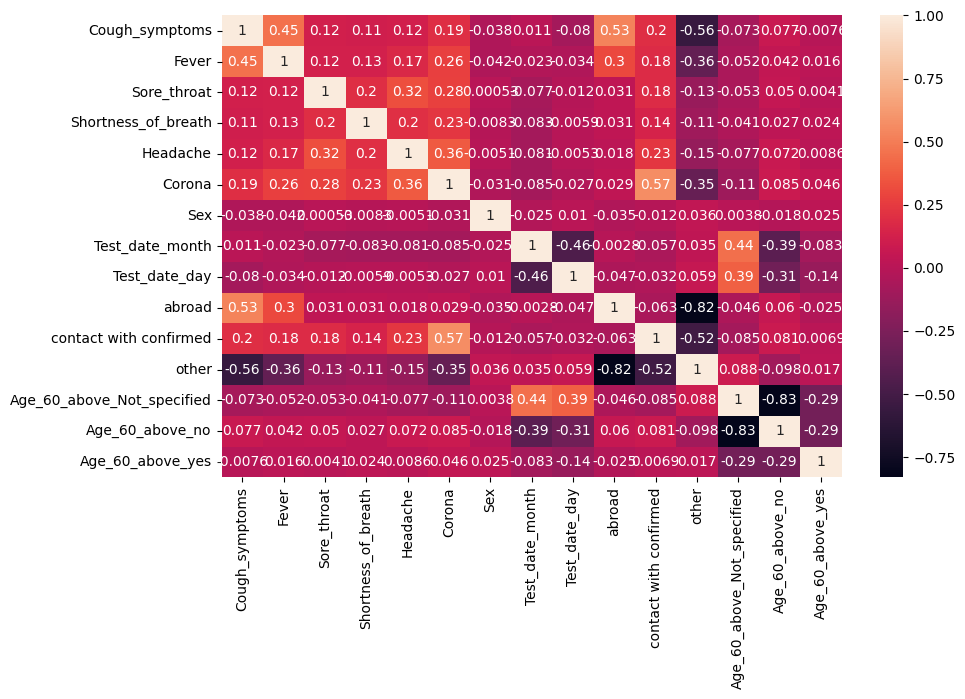

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [40]:
x=df.drop('Corona',axis=1)
y=df['Corona']

In [41]:
print(y.value_counts())

0    264119
1     14729
Name: Corona, dtype: int64


In [42]:
# Using data without applying oversampling and undersampling

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [44]:
log=LogisticRegression(solver='lbfgs',class_weight={0:1,1:3})
grid={'C':[100],'penalty':['l2']}
cv=KFold(n_splits=5,shuffle=True,random_state=5005)

In [45]:
clf=GridSearchCV(log,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=KFold(n_splits=5, random_state=5005, shuffle=True),
             estimator=LogisticRegression(class_weight={0: 1, 1: 3}), n_jobs=-1,
             param_grid={'C': [100], 'penalty': ['l2']}, scoring='f1_macro')

In [46]:
clf.best_params_

{'C': 100, 'penalty': 'l2'}

In [47]:

y_pre=clf.predict(x_test)

In [ ]:
#Measurements

In [48]:
print(confusion_matrix(y_test,y_pre))
print(accuracy_score(y_test,y_pre))
print(classification_report(y_test,y_pre))

[[52078   697]
 [ 1088  1907]]
0.9679935449166218
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     52775
           1       0.73      0.64      0.68      2995

    accuracy                           0.97     55770
   macro avg       0.86      0.81      0.83     55770
weighted avg       0.97      0.97      0.97     55770



In [ ]:
#Applying SMOTE Sampling

In [50]:
sm=SMOTE(random_state=2)
x_sm,y_sm=sm.fit_resample(x,y)


In [51]:
x_train_sm,x_test_sm,y_train_sm,y_test_sm=train_test_split(x_sm,y_sm,test_size=0.2)

In [52]:
log_1=LogisticRegression()
grid={'C':[0.1],'penalty':['l2']}
clf=GridSearchCV(log_1,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(x_train_sm,y_train_sm)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=KFold(n_splits=5, random_state=5005, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1], 'penalty': ['l2']}, scoring='f1_macro')

In [53]:
clf.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [54]:
y_pre1=clf.predict(x_test_sm)

In [55]:
print(confusion_matrix(y_test_sm,y_pre1))
print(accuracy_score(y_test_sm,y_pre1))
print(classification_report(y_test_sm,y_pre1))

[[48417  4150]
 [13644 39437]]
0.8315727699530516
              precision    recall  f1-score   support

           0       0.78      0.92      0.84     52567
           1       0.90      0.74      0.82     53081

    accuracy                           0.83    105648
   macro avg       0.84      0.83      0.83    105648
weighted avg       0.84      0.83      0.83    105648



In [55]:
#Before applying Smote

In [56]:
knn =KNeighborsClassifier()
grid={'metric': ['manhattan'], 'n_neighbors': [11], 'weights': ['distance']}
clf=GridSearchCV(knn,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=5005, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['manhattan'], 'n_neighbors': [11],
                         'weights': ['distance']},
             scoring='f1_macro')

In [57]:
clf.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

In [58]:
y_pre2=clf.predict(x_test)

print(confusion_matrix(y_test,y_pre2))
print(accuracy_score(y_test,y_pre2))
print(classification_report(y_test,y_pre2))

[[52343   432]
 [ 1314  1681]]
0.9686928456159225
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     52775
           1       0.80      0.56      0.66      2995

    accuracy                           0.97     55770
   macro avg       0.89      0.78      0.82     55770
weighted avg       0.97      0.97      0.97     55770



In [ ]:
# Applying SMOTE

In [59]:
grid={'metric': ['euclidean'], 'n_neighbors': [4], 'weights': ['uniform'] }
clf=GridSearchCV(knn,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(x_train_sm,y_train_sm)

GridSearchCV(cv=KFold(n_splits=5, random_state=5005, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean'], 'n_neighbors': [4],
                         'weights': ['uniform']},
             scoring='f1_macro')

In [60]:
clf.best_params_

{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}

In [61]:

y_pre3=clf.predict(x_test_sm)

print(confusion_matrix(y_test_sm,y_pre3))
print(accuracy_score(y_test_sm,y_pre3))
print(classification_report(y_test_sm,y_pre3))

[[49249  3318]
 [11900 41181]]
0.8559556262305013
              precision    recall  f1-score   support

           0       0.81      0.94      0.87     52567
           1       0.93      0.78      0.84     53081

    accuracy                           0.86    105648
   macro avg       0.87      0.86      0.86    105648
weighted avg       0.87      0.86      0.86    105648



In [62]:
#Default sampling

In [ ]:
sv=svm.SVC()
grid={'C': [10.0], 'degree': [2], 'gamma': [0.1], 'kernel': ['linear']}
clf=GridSearchCV(sv,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(x_train,y_train)


In [ ]:
clf.best_params_

In [ ]:
y_pre4=clf.predict(x_test)

print(confusion_matrix(y_test,y_pre4))
print(accuracy_score(y_test,y_pre4))
print(classification_report(y_test,y_pre4))

In [ ]:
# SMOTE Oversampling

In [65]:
sv=svm.SVC()
grid={'C': [10.0], 'degree': [2], 'gamma': [0.1], 'kernel': ['linear']}
clf=GridSearchCV(sv,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(x_train_sm,y_train_sm)


KeyboardInterrupt: 

In [ ]:
clf.best_params_

In [ ]:
y_pre5=clf.predict(x_test_sm)

print(confusion_matrix(y_test_sm,y_pre5))
print(accuracy_score(y_test_sm,y_pre5))
print(classification_report(y_test_sm,y_pre5))

In [ ]:
np.arange(1,16,2)

In [66]:
# default sampling (imbalanced)

In [67]:

rfc = RandomForestClassifier()

grid = {'criterion': ['gini'],
 'max_depth': [9],
 'max_features': ['sqrt'],
 'n_estimators': [500],
 'n_jobs': [-1]}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

clf = GridSearchCV(rfc, grid, cv=cv, n_jobs=-1, scoring='f1_macro')
clf.fit(x_train, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [9],
                         'max_features': ['sqrt'], 'n_estimators': [500],
                         'n_jobs': [-1]},
             scoring='f1_macro')

In [68]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'n_estimators': 500,
 'n_jobs': -1}

In [69]:
y_pre6=clf.predict(x_test)

print(confusion_matrix(y_test,y_pre6))
print(accuracy_score(y_test,y_pre6))
print(classification_report(y_test,y_pre6))

[[52376   399]
 [ 1223  1772]]
0.9709162632239555
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     52775
           1       0.82      0.59      0.69      2995

    accuracy                           0.97     55770
   macro avg       0.90      0.79      0.84     55770
weighted avg       0.97      0.97      0.97     55770



In [ ]:
# After Oversampling (SMOTE)

In [70]:

rfc = RandomForestClassifier()

grid = {'criterion': ['gini'],
 'max_depth': [10],
 'max_features': ['sqrt'],
 'n_estimators': [500],
 'n_jobs': [-1]}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

clf = GridSearchCV(rfc, grid, cv=cv, n_jobs=-1, scoring='f1_macro')
clf.fit(x_train, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [10],
                         'max_features': ['sqrt'], 'n_estimators': [500],
                         'n_jobs': [-1]},
             scoring='f1_macro')

In [71]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 500,
 'n_jobs': -1}

In [72]:
y_pre7=clf.predict(x_test_sm)

print(confusion_matrix(y_test_sm,y_pre7))
print(accuracy_score(y_test_sm,y_pre7))
print(classification_report(y_test_sm,y_pre7))

[[52187   380]
 [23141 29940]]
0.7773644555505074
              precision    recall  f1-score   support

           0       0.69      0.99      0.82     52567
           1       0.99      0.56      0.72     53081

    accuracy                           0.78    105648
   macro avg       0.84      0.78      0.77    105648
weighted avg       0.84      0.78      0.77    105648

